In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import faceBlendCommon as fbc
import dlib
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Landmark model location
MODEL_PATH = "../resources/models/shape_predictor_68_face_landmarks.dat"

# Get the face detector
face_detector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmark_detector = dlib.shape_predictor(MODEL_PATH)

In [4]:
# Read two images
im1 = cv2.imread("../resources/images/presidents/bill-clinton.jpg")
im2 = cv2.imread("../resources/images/presidents/george-w-bush.jpg")

In [5]:
# Detect landmarks in both images.
points1 = fbc.getLandmarks(face_detector, landmark_detector, im1)
points2 = fbc.getLandmarks(face_detector, landmark_detector, im2)

points1 = np.array(points1)
points2 = np.array(points2)

# Convert image to floating point in the range 0 to 1
im1 = np.float32(im1)/255.0
im2 = np.float32(im2)/255.0

In [6]:
# Dimensions of output image
h = 600
w = 600

# Normalize image to output coordinates.
imNorm1, points1 = fbc.normalizeImagesAndLandmarks((h, w), 
                                                  im1, points1)
imNorm2, points2 = fbc.normalizeImagesAndLandmarks((h, w), 
                                                  im2, points2)

In [7]:
# Calculate average points. Will be used for Delaunay triangulation.
pointsAvg = (points1 + points2)/2.0

# 8 Boundary points for Delaunay Triangulation
boundaryPoints = fbc.getEightBoundaryPoints(h, w)
points1 = np.concatenate((points1, boundaryPoints), axis=0)
points2 = np.concatenate((points2, boundaryPoints), axis=0)
pointsAvg = np.concatenate((pointsAvg, boundaryPoints), axis=0)

# Calculate Delaunay triangulation.
rect = (0, 0, w, h)
dt = fbc.calculateDelaunayTriangles(rect, pointsAvg)

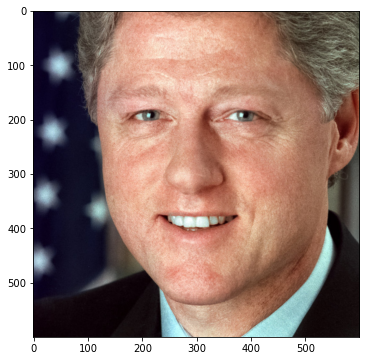

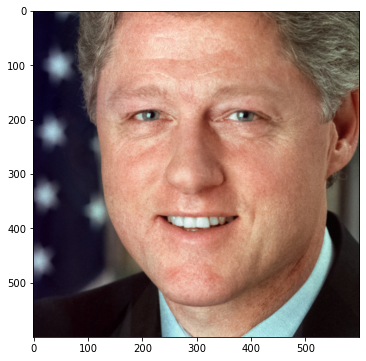

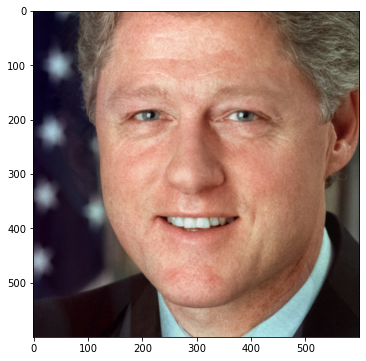

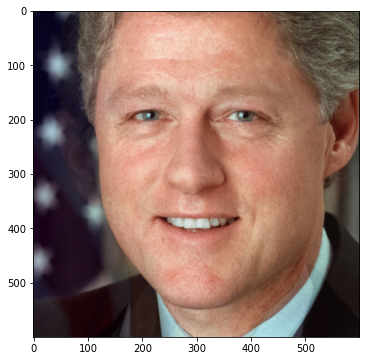

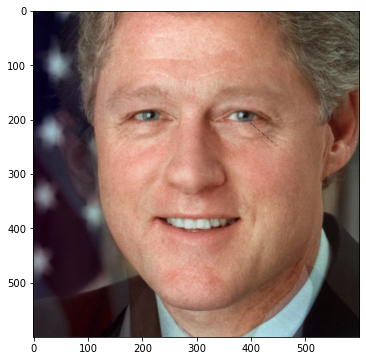

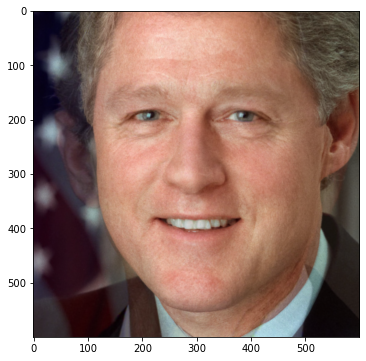

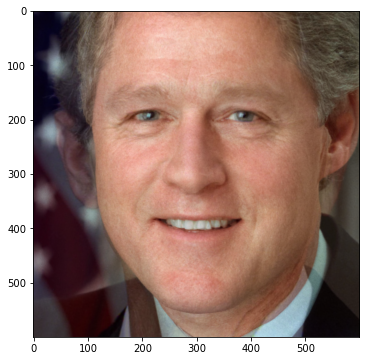

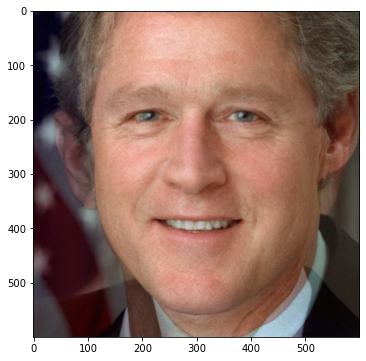

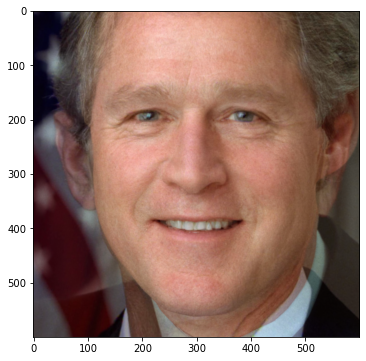

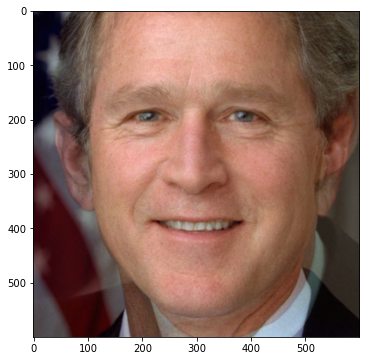

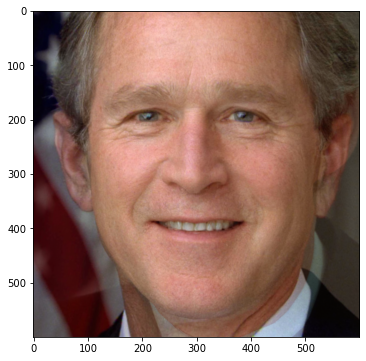

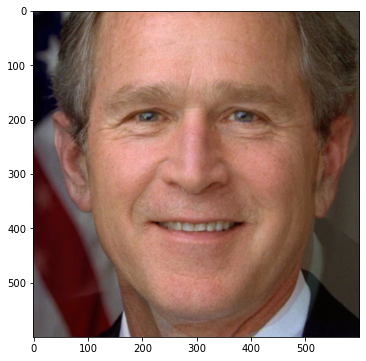

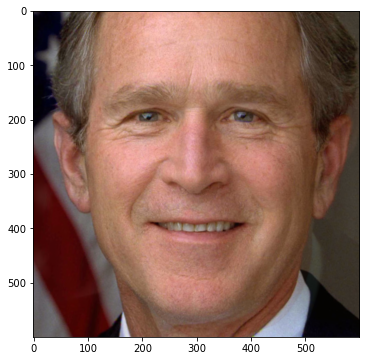

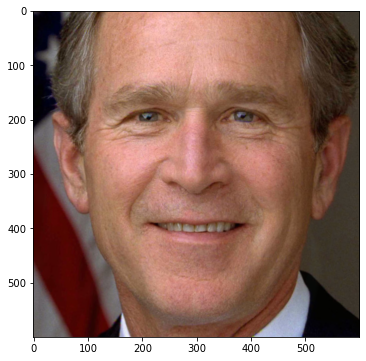

In [16]:
# Start animation.
alpha = 0
increaseAlpha = True
while True:
    # Compute landmark points based on morphing parameter alpha
    pointsMorph = (1 - alpha) * points1 + alpha * points2

    # Warp images such that normalized points line up 
    # with morphed points.
    imOut1 = fbc.warpImage(imNorm1, points1, pointsMorph.tolist(), dt)
    imOut2 = fbc.warpImage(imNorm2, points2, pointsMorph.tolist(), dt)

    # Blend warped images based on morphing parameter alpha
    imMorph = (1 - alpha) * imOut1 + alpha * imOut2
    
    # Keep animating by ensuring alpha stays between 0 and 1.
    if (alpha <= 0 and not increaseAlpha):
        increaseAlpha = True
    if (alpha >= 1 and increaseAlpha):
        break
        increaseAlpha = False

    if increaseAlpha:
        alpha += 0.075
    else:
        alpha -= 0.075
        
    plt.imshow(imMorph[:,:,::-1])
    plt.show()

In [10]:
imMorph.shape

(600, 600, 3)

In [15]:
cv2.imwrite("output.jpg", imMorph*255)


True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


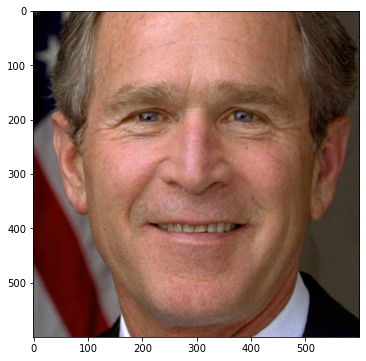

In [13]:
plt.imshow(imMorph[:,:,::-1])

In [14]:
imMorph*255)

array([[[ 0.24128062,  0.2433701 ,  0.25927237],
        [ 0.22276959,  0.24150656,  0.2655155 ],
        [ 0.21137866,  0.24499385,  0.2759191 ],
        ...,
        [ 0.18215686,  0.2205882 ,  0.24980392],
        [ 0.18738052,  0.22522366,  0.2548315 ],
        [ 0.19609067,  0.2339338 ,  0.26354167]],

       [[ 0.2586397 ,  0.2190058 ,  0.24507353],
        [ 0.24300869,  0.21853453,  0.25543517],
        [ 0.2310197 ,  0.22054712,  0.26287633],
        ...,
        [ 0.18968353,  0.22806174,  0.2572831 ],
        [ 0.18423836,  0.22226772,  0.25175142],
        [ 0.18189786,  0.21974099,  0.24934882]],

       [[ 0.25062922,  0.20240617,  0.22985716],
        [ 0.2450595 ,  0.20674455,  0.24996641],
        [ 0.24627396,  0.21264766,  0.26030084],
        ...,
        [ 0.18895264,  0.22729918,  0.25651753],
        [ 0.18485859,  0.22270171,  0.25230953],
        [ 0.17674325,  0.21458639,  0.24419421]],

       ...,

       [[ 0.40657628,  0.42016083,  0.4342233 ],
        [ 0